# SOM Training on IRIS Dataset


In [2]:
import torch
import matplotlib
from sklearn.datasets import load_iris
from fastsom import *


### Creating the DataBunch

In [3]:
def iris():
    "Loads the IRIS dataset into two tensors."
    iris = load_iris()
    x = torch.tensor(iris.data)
    y = torch.tensor(iris.target)
    labels = iris.feature_names
    
    return x, y, labels

In [4]:
x, y, labels = iris()

In [5]:
db = UnsupervisedDataBunch(x, valid=0.05, sampler='shuffle', bs=50)

### Normalization

For this step we will use the variance normalizer, which in our tests seems to work really well with Self-Organizing Maps.

In [6]:
db.normalize('var')

In [7]:
d = db.train_ds.tensors[0]
d.mean(0), d.std(0)

(tensor([-9.0538e-16,  1.6262e-16,  1.7982e-17, -5.2853e-16],
        dtype=torch.float64),
 tensor([1.0000, 1.0000, 1.0000, 1.0000], dtype=torch.float64))

### Creating the Learner

In [8]:
size = (8, 8, 4)

som = Som(size)

learn = SomLearner(db, 
    som,
    lr=[0.6, 0.3, 0.1], 
    metrics=[topologic_err],
    visualize=['weights'],
    trainer=ExperimentalSomTrainer)

### Training the model

<IPython.core.display.Javascript object>


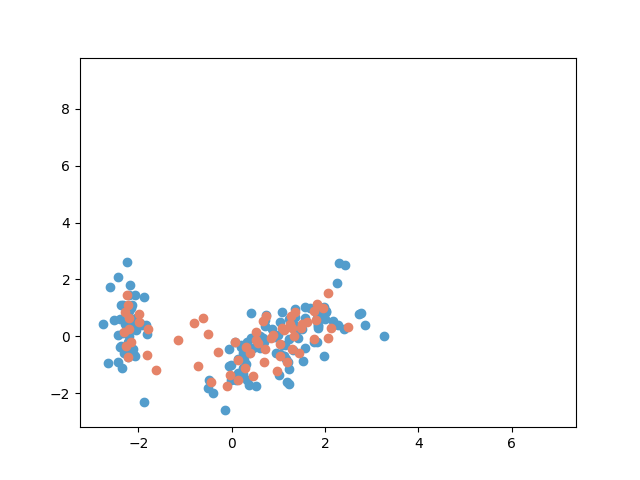

epoch,train_loss,valid_loss,topologic_err,time
0,3.132746,1.543080,5.000000,00:00
1,2.297909,1.255525,5.000000,00:00
2,1.962810,1.066124,3.000000,00:00
3,1.726164,0.864807,3.000000,00:00
4,1.544718,0.755651,4.000000,00:00
5,1.400420,0.708913,4.000000,00:00
6,1.291406,0.676378,4.000000,00:00
7,1.206022,0.669566,5.000000,00:00
8,1.139443,0.652338,5.000000,00:00
9,1.085280,0.648874,5.000000,00:00


In [9]:
%matplotlib notebook
learn.fit(200)

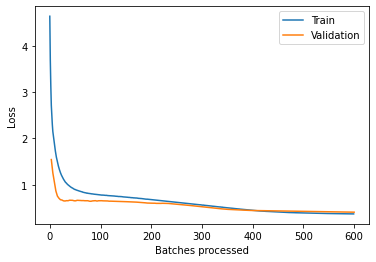

In [10]:
%matplotlib inline
learn.recorder.plot_losses()

### Interpretation

In [11]:
interp = SomInterpretation.from_learner(learn)

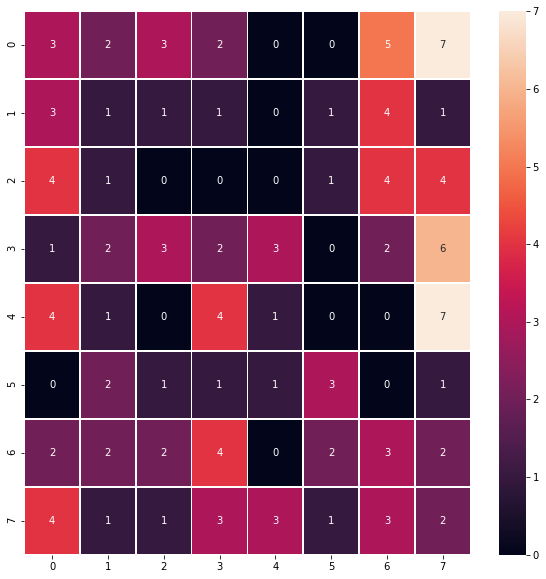

In [12]:
%matplotlib inline
interp.show_hitmap()

/usr/local/lib/python3.6/dist-packages/fastsom-0.1-py3.6.egg/fastsom/interp/interp.py:158: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


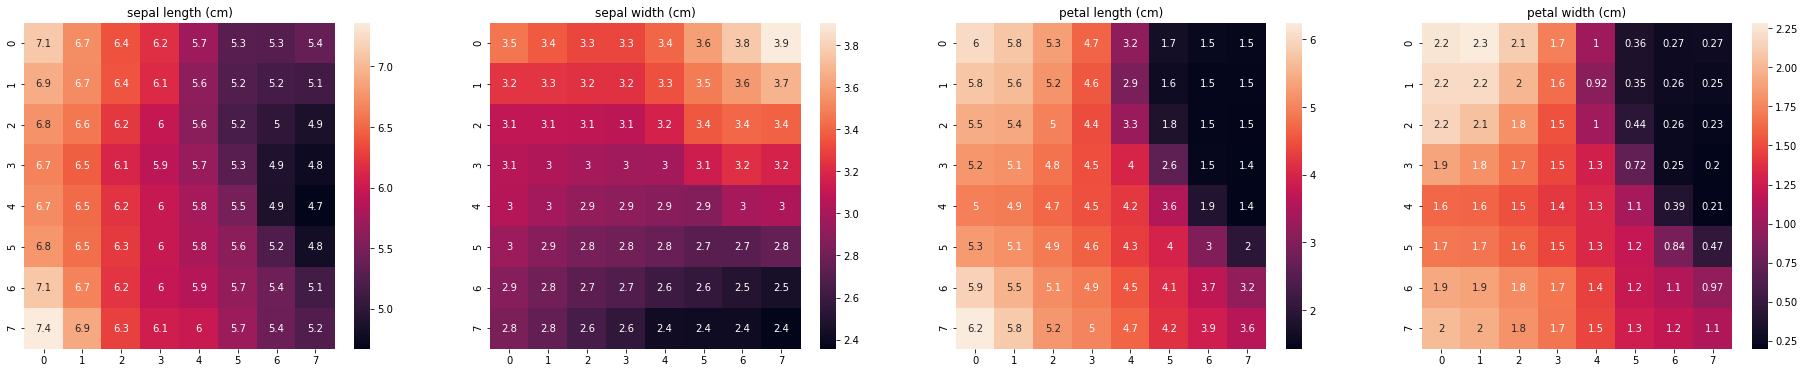

In [13]:
%matplotlib inline
interp.show_feature_heatmaps(cont_labels=labels, recategorize=False)

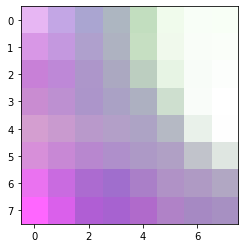

In [14]:
%matplotlib inline
interp.show_weights()